170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 47s 0us/step


C:\Users\eromn\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.5662 - loss: 0.6761 - val_accuracy: 0.6485 - val_loss: 0.6239
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.6716 - loss: 0.6028 - val_accuracy: 0.6960 - val_loss: 0.5770
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.7065 - loss: 0.5651 - val_accuracy: 0.7055 - val_loss: 0.5737
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.7287 - loss: 0.5356 - val_accuracy: 0.7070 - val_loss: 0.5806
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.7456 - loss: 0.5100 - val_accuracy: 0.7280 - val_loss: 0.5340
63/63 - 1s - 8ms/step - accuracy: 0.7280 - loss: 0.5340

Test accuracy: 0.73
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


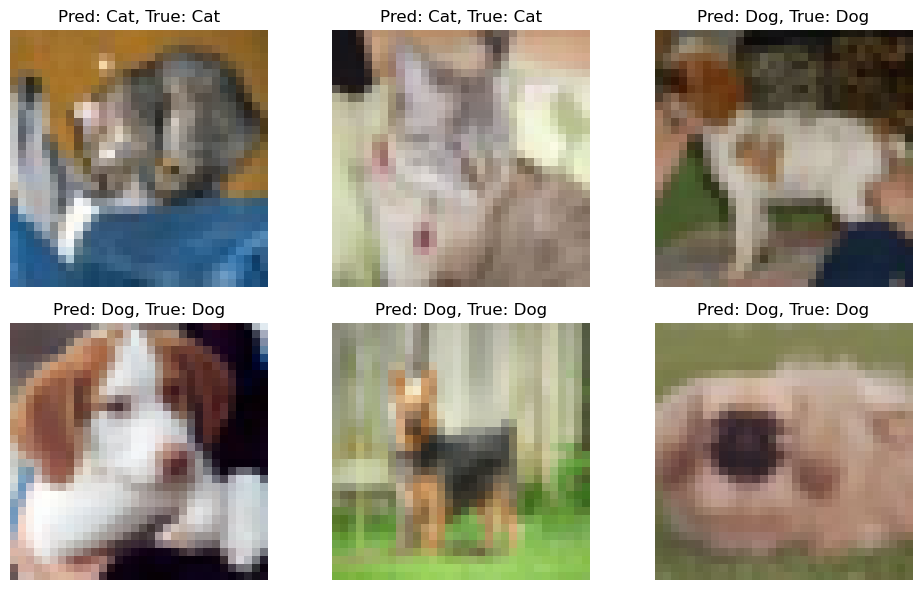

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np

# Load dataset (we'll use only 2 classes from CIFAR-10: Cat=3, Dog=5)
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Filter for cats (label 3) and dogs (label 5)
train_filter = np.where((y_train == 3) | (y_train == 5))[0]
test_filter = np.where((y_test == 3) | (y_test == 5))[0]

x_train, y_train = x_train[train_filter], y_train[train_filter]
x_test, y_test = x_test[test_filter], y_test[test_filter]

# Convert labels: cat=0, dog=1
y_train = (y_train == 5).astype(int)
y_test = (y_test == 5).astype(int)

# Normalize the image data
x_train, x_test = x_train / 255.0, x_test / 255.0

# Build the CNN model
model = models.Sequential([
    layers.Conv2D(16, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Evaluate
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc:.2f}')

# Show some predictions
predictions = (model.predict(x_test) > 0.5).astype(int)

# Visualize some test images with predictions
class_names = ['Cat', 'Dog']
plt.figure(figsize=(10, 6))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(x_test[i])
    plt.title(f"Pred: {class_names[predictions[i][0]]}, True: {class_names[y_test[i][0]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()
